In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1: Preparing the Data

In [2]:
# loading Data
df = pd.read_csv('Resources/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Count of rows with null values
df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [5]:
# Removing MYOPIC column
X = df.drop(['MYOPIC'], axis=1)
y = df['MYOPIC']

In [13]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR']])
print(scaled_data[0:3])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378]]


In [14]:
# New DF with scaled data
new_df = pd.DataFrame(scaled_data, columns=X.columns[:-2])

In [16]:
# Adding binary columns back to df
new_df['MOMMY'] = X['MOMMY']
new_df['DADMY'] = X['DADMY']
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0


## Part 2 : Applying Demensionality Reduction

In [20]:
# Initialize PCA model
pca = PCA(n_components=.90)
# Get principal components for the data
df_pca = pca.fit_transform(new_df)
df_pca.shape

(618, 9)

Number of features reduced down to 9

In [21]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.23709653, 0.17470773, 0.09439418, 0.08260749, 0.07899141,
       0.07203043, 0.07101828, 0.05837071, 0.0488404 ])

In [22]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=300)

In [23]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(618, 2)

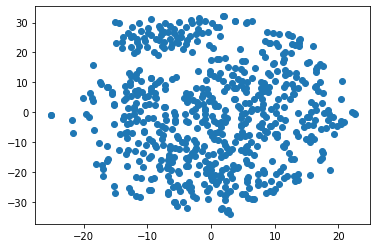

In [24]:
# Creating scatter plot
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

There appears to be two clusters, not very noticable though. 

## Part 3: Cluster Analysis with K-means